In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import re

# –ü–æ—Å–ª–µ –∏–º–ø–æ—Ä—Ç–∞ –±–∏–±–ª–µ–æ—Ç–µ–∫ –Ω–∞—á–∏–Ω–∞–µ–º –≤–∑—è—Ç—å –¥–∞–Ω–Ω—ã–µ –∏–∑ —Å–∞–π—Ç–∞, —á–µ—Ä–µ–∑ request –∏ bs4 

In [2]:
url = "https://krisha.kz/prodazha/kvartiry/almaty/?das[map.complex]=0"

In [3]:
pr = []
zhk = []
dom = []
mkr = []
inf = []
kom = []
informat = soup.find_all("a", class_="a-card__title")
price = soup.find_all("div", class_="a-card__price")
zheloi =soup.find_all("div", class_="a-card__text-preview")
mikro = soup.find_all("div", class_="a-card__subtitle")
for i in range(0, len(price)):
    inf.append(re.findall('\d{3}|\d\d', informat[i].get_text())[0])
    kom.append(informat[i].get_text()[0])
    pr.append(''.join(filter(str.isdigit, price[i].text.strip().replace("\xa0", ""))))
    zhk.append(re.findall('^[^,]*', zheloi[i].get_text().replace("\n", "")[34:]))
    dom.append(re.findall('–ø–æ—Ç–æ–ª–∫–∏ (\d|\d.\d)–º', zheloi[i].get_text()))
    mkr.append(re.findall('^[^,]*', mikro[i].get_text().replace(" ", "")[1:]))
dom_a = []
for l in range(0, len(dom)):
    for s in dom[l]:
        dom_a.append(s)
    if len(dom[l]) == 0:
        dom_a.append("0")
mkr_a = np.concatenate(mkr)
zhk_a = np.concatenate(zhk)
len(inf)

NameError: name 'soup' is not defined

In [ ]:
dataset = []
for k in range(0, len(price)):
    row = [
        inf[k],
        dom_a[k],
        mkr_a[k],
        zhk_a[k],
        kom[k],
        pr[k]]
    dataset.append(row)
print(dataset)

# –ö–æ–¥ –¥–ª—è –≤–∑—è—Ç–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ—á—Ç–∏ –≥–æ—Ç–æ–≤–æ 
–°–¥–µ–ª–∞–ª —ç—Ç–æ —á–µ—Ä–µ–∑ re, numpy –∏ —Ü–∏–∫–ª—ã

In [70]:
def get_data(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "lxml")
    pr, zhk, dom, mkr, inf, kom = [], [], [], [], [], []
    informat = soup.find_all("a", class_="a-card__title")
    price = soup.find_all("div", class_="a-card__price")
    zheloi =soup.find_all("div", class_="a-card__text-preview")
    mikro = soup.find_all("div", class_="a-card__subtitle")
    for i in range(0, len(price)):
        inf.append(re.findall('\d{3}|\d\d', informat[i].get_text())[0])
        kom.append(informat[i].get_text()[0])
        pr.append(''.join(filter(str.isdigit, price[i].text.strip().replace("\xa0", ""))))
        zhk.append(re.findall('^[^,]*', zheloi[i].get_text().replace("\n", "")[34:]))
        dom.append(re.findall('–ø–æ—Ç–æ–ª–∫–∏ (\d|\d.\d)–º', zheloi[i].get_text()))
        mkr.append(re.findall('^[^,]*', mikro[i].get_text().replace(" ", "")[1:]))
    dom_a = []
    for l in range(0, len(dom)):
        for s in dom[l]:
            dom_a.append(s)
        if len(dom[l]) == 0:
            dom_a.append(None)
    mkr_a = np.concatenate(mkr)
    zhk_a = np.concatenate(zhk)
    dataset = []
    for k in range(0, len(price)):
        row = [
            inf[k],
            dom_a[k],
            mkr_a[k].replace("\n", ""),
            zhk_a[k],
            kom[k],
            pr[k]]
        dataset.append(row)
    return dataset

In [15]:
ds = []
for san in range(850):
    ds.append(get_data('https://krisha.kz/prodazha/kvartiry/almaty/?das[map.complex]=0&page='+str(san)))

In [17]:
ds

[[['90', '2.8', '–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω', 'Alma City 4', '3', '50000000'],
  ['130', '2.8', '–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω', 'Esentai Apartments', '3', '215000000'],
  ['57', '2.7', '–ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω', '–ê–ª–º–∞–ª—ã', '2', '38000000'],
  ['64', '2.7', '–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω', '12 –º–µ—Å—è—Ü–µ–≤', '2', '45000000'],
  ['85', '0', '–ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω', 'Vostochka.kz', '3', '48500000'],
  ['55', '0', '–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω', '–ê–ª—Ç—ã–Ω –ë—É–ª–∞–∫', '2', '37000000'],
  ['56', '2.7', '–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π—Ä-–Ω', 'Dragon City', '3', '31500000'],
  ['55', '0', '–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω', 'Jazz-–∫–≤–∞—Ä—Ç–∞–ª', '2', '45500000'],
  ['47', '2.7', '–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω', 'Alem City', '1', '22000000'],
  ['47', '2.7', '–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω', 'Alem City', '2', '22000000'],
  ['32', '2.7', '–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω', 'Alma City', '1', '15000000'],
  ['78', '3', '–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω', 'Munar Tau', '2', '46043600'],
 

In [19]:
data = []
for k in range(len(ds)):
    for s in ds[k]:
        data.append(s)

In [20]:
df = pd.DataFrame(data,
                 columns = ["–ü–ª–æ—â–∞–¥—å –∫–≤2", "–ü–æ—Ç–æ–ª–∫–∏", "–†–∞–π–æ–Ω", "–ñ–ö", "–ö–æ–º–Ω–∞—Ç–∞", "–¶–µ–Ω–∞"])
df

–ü–ª–æ—â–∞–¥—å –∫–≤2 –ü–æ—Ç–æ–ª–∫–∏             –†–∞–π–æ–Ω                   –ñ–ö –ö–æ–º–Ω–∞—Ç–∞  \
0              90     2.8  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4       3   
1             130     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3   
2              57     2.7     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã       2   
3              64     2.7    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤       2   
4              85       0      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz       3   
...           ...     ...               ...                  ...     ...   
17001          30     2.8  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman       1   
17002          82       3  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills       2   
17003          22     2.8     –ñ–µ—Ç—ã—Å—É—Å–∫–∏–π—Ä-–Ω              ZHARKYN       1   
17004         109     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3   
17005          65     3.2      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence       2   

            –¶–µ–Ω–∞  
0       50000000  
1      215000000  
2       38000000  
3       45000000  
4       48500000  
...          ...  
17001   16300000  
17002   69990000  
17003   15500000  
17004  175000000  
17005   65000000  

[17006 rows x 6 columns]

In [26]:
df["–ñ–ö"].unique()

array(['Alma City 4', 'Esentai Apartments', '–ê–ª–º–∞–ª—ã', '12 –º–µ—Å—è—Ü–µ–≤',
       'Vostochka.kz', '–ê–ª—Ç—ã–Ω –ë—É–ª–∞–∫', 'Dragon City', 'Jazz-–∫–≤–∞—Ä—Ç–∞–ª',
       'Alem City', 'Alma City', 'Munar Tau', 'AFD Plaza', 'Belgravia',
       'Lancashire', 'Alatau City', 'Ush Qo≈Ñyr', '–î–æ–ª–∏–Ω–∞ —Ä–æ–∑', '–ö–æ–∫–∂–∏–µ–∫',
       'Gulder', 'SOFIA', '–ê–∫–∫–µ–Ω—Ç', 'Union', '–ú–µ—Ä–∫—É—Ä –ì—Ä–∞–¥',
       '–ö–£–ê–¢ –Ω–∞ –°–∞—Ç–ø–∞–µ–≤–∞ - –ì–∞–≥–∞—Ä–∏–Ω–∞', 'Sunday Terrace', '–ê–ª–º–∞–∑', 'Oasis',
       'Aspen', '–†–æ–¥–Ω–∏–∫', 'Sicilia', 'Koksai –Æ–±–∏–ª–µ–π–Ω—ã–π', 'Aulet',
       'ORDA TOWN', 'Lifetown', 'Arena Park', 'Gate City', '–•–∞–Ω-–¢–µ–Ω–≥—Ä–∏',
       'Aqtolqyn Grand', 'Green City', 'Nova Park', 'Apple Residence',
       'Millennium Park', 'Nest grand', 'Sunny Village',
       'Etasa Residence', 'Admiral', 'AL‚ÄôFARABI 27', 'Estet',
       'Miras Park', 'Seven Hills', 'METROPOLE', 'Riviera', 'Auezov City',
       'Nurly Dala', 'Primavera', '–¢–∞–Ω –ù—É—Ä—ã', 'Amir', '–

In [53]:
coun_less_10 = []
for m in df['–ñ–ö'].unique():
    element = m
    coun = np.count_nonzero(df['–ñ–ö'] == m)
    if coun <= 10:
        print(m, ": ", coun)
        coun_less_10.append(m)

Belgravia :  3
Sunday Terrace :  4
–ê–ª–º–∞–∑ :  5
Oasis :  3
–†–æ–¥–Ω–∏–∫ :  9
Koksai –Æ–±–∏–ª–µ–π–Ω—ã–π :  5
ORDA TOWN :  10
Gate City :  7
Nova Park :  2
Sunny Village :  4
–†–µ—Å–º–∏ –ì—Ä—É–ø–ø :  3
Green :  3
Altyn-Ai :  6
Vertu Hills :  1
ANAYAT :  4
Nova 23 :  2
–ê–π–Ω–∞–±—É–ª–∞–∫ 33/2 :  2
Sky Villa :  9
Jana Qainar :  3
–ö–æ—Å–º–æ :  8
–î–æ—Å—Ç–∞—Ä Deluxe :  6
Dostar :  8
4Hills :  5
–ì–æ—Ä–Ω–∞—è –î–æ–ª–∏–Ω–∞ :  7
–†–µ–º–∏–∑–æ–≤–∫–∞ :  9
Alasha Residence :  7
–†–µ–∞–ª –ê–ª–º–∞—Ç—ã :  9
Hill Town Residence :  7
–∞–ª :  3
–ê—Ä–º–∞–Ω –í–∏–ª–ª–∞ :  7
 –†–∞–π—ã–º–±–µ–∫–∞ :  3
Evim Novo :  6
–ú–∫—Ä –ñ–µ—Ç—ã—Å—É-3 :  10
–ö—É–∞–Ω—ã—à :  7
Chocolate :  10
–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π –Ω–∞ –¢—É–ª–µ–±–∞–µ–≤–∞ :  2
–ñ–ö –≤ –º–∫—Ä. –°–∞—è–ª—ã :  7
–¥ :  6
Belle View :  1
–ê—Ä–∏—è :  4
–ñ–ö –Ω–∞ –¢–∞—à–∫–µ–Ω—Ç—Å–∫–æ–π :  6
La Grace :  3
–æ–≥–æ :  3
–ë–∞–∑–∏—Å –Ω–∞ –ó–µ–Ω–∫–æ–≤–∞ 33 :  3
Four Seasons Villa :  5
–°–∞—Ä—ã–∞—Ä–∫–∞ :  9
–†–∞–ø—Å–æ–¥–∏—è :  10
Seneca :  5
–ë–∞—Ä–∞–∫–∞—Ç :  2
–ö–ª—É–±–Ω

In [63]:
len(coun_less_10)

323

In [62]:
df2 = df[~df["–ñ–ö"].isin(coun_less_10)]
df2

–ü–ª–æ—â–∞–¥—å –∫–≤2 –ü–æ—Ç–æ–ª–∫–∏             –†–∞–π–æ–Ω                   –ñ–ö –ö–æ–º–Ω–∞—Ç–∞  \
0              90     2.8  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4       3   
1             130     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3   
2              57     2.7     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã       2   
3              64     2.7    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤       2   
4              85       0      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz       3   
...           ...     ...               ...                  ...     ...   
17000         100       3  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω              –ê–π–≥–µ—Ä–∏–º       3   
17001          30     2.8  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman       1   
17002          82       3  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills       2   
17004         109     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3   
17005          65     3.2      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence       2   

            –¶–µ–Ω–∞  
0       50000000  
1      215000000  
2       38000000  
3       45000000  
4       48500000  
...          ...  
17000   77000000  
17001   16300000  
17002   69990000  
17004  175000000  
17005   65000000  

[15732 rows x 6 columns]

In [66]:
df[df["–ñ–ö"]=="Esentai Apartments"]

–ü–ª–æ—â–∞–¥—å –∫–≤2 –ü–æ—Ç–æ–ª–∫–∏             –†–∞–π–æ–Ω                  –ñ–ö –ö–æ–º–Ω–∞—Ç–∞  \
1             130     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       3   
24            130     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       3   
454            82     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       2   
666           182     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       4   
669           143     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       3   
...           ...     ...               ...                 ...     ...   
16218         109     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       3   
16225         109     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       3   
16331          85     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       2   
16945         187     2.9  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       4   
17004         109     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Esentai Apartments       3   

            –¶–µ–Ω–∞  
1      215000000  
24     215000000  
454    129000000  
666    282100000  
669    221650000  
...          ...  
16218  175000000  
16225  178500000  
16331  180000000  
16945  250000000  
17004  175000000  

[114 rows x 6 columns]

In [67]:
df2.isnull().sum()

–ü–ª–æ—â–∞–¥—å –∫–≤2    0
–ü–æ—Ç–æ–ª–∫–∏        0
–†–∞–π–æ–Ω          0
–ñ–ö             0
–ö–æ–º–Ω–∞—Ç–∞        0
–¶–µ–Ω–∞           0
dtype: int64

In [69]:
df2[df["–ü–æ—Ç–æ–ª–∫–∏"]=="0"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3915194069.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df["–ü–æ—Ç–æ–ª–∫–∏"]=="0"]


–ü–ª–æ—â–∞–¥—å –∫–≤2 –ü–æ—Ç–æ–ª–∫–∏             –†–∞–π–æ–Ω            –ñ–ö –ö–æ–º–Ω–∞—Ç–∞       –¶–µ–Ω–∞
4              85       0      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Vostochka.kz       3   48500000
5              55       0    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω   –ê–ª—Ç—ã–Ω –ë—É–ª–∞–∫       2   37000000
7              55       0  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Jazz-–∫–≤–∞—Ä—Ç–∞–ª       2   45500000
15             76       0  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω     Alem City       3   31000000
19             58       0     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω   Alatau City       2   39500000
...           ...     ...               ...           ...     ...        ...
16992          60       0  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω   Alma City 5       2   27500000
16993          38       0  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω      –ê–∫–≤–∞—Ä–µ–ª—å       1   35000000
16994         105       0  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω        –í–µ—Ä–Ω—ã–π       3  140000000
16995         100       0  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  Jazz-–∫–≤–∞—Ä—Ç–∞–ª       3   98000000
16996          75       0  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω       Riviera       3   69900000

[3445 rows x 6 columns]

In [75]:
df["–ü–æ—Ç–æ–ª–∫–∏"]

0        2.8
1        2.8
2        2.7
3        2.7
4          0
        ... 
17001    2.8
17002      3
17003    2.8
17004    2.8
17005    3.2
Name: –ü–æ—Ç–æ–ª–∫–∏, Length: 17006, dtype: object

In [78]:
pot = []
for it in df2["–ü–æ—Ç–æ–ª–∫–∏"]:
    pot.append(float(it))
df2["–ü–ø–æ—Ç–æ–ª–∫–∏"] = pot
df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3904871871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["–ü–ø–æ—Ç–æ–ª–∫–∏"] = pot


–ü–ª–æ—â–∞–¥—å –∫–≤2 –ü–æ—Ç–æ–ª–∫–∏             –†–∞–π–æ–Ω                   –ñ–ö –ö–æ–º–Ω–∞—Ç–∞  \
0              90     2.8  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4       3   
1             130     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3   
2              57     2.7     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã       2   
3              64     2.7    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤       2   
4              85       0      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz       3   
...           ...     ...               ...                  ...     ...   
17000         100       3  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω              –ê–π–≥–µ—Ä–∏–º       3   
17001          30     2.8  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman       1   
17002          82       3  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills       2   
17004         109     2.8  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3   
17005          65     3.2      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence       2   

            –¶–µ–Ω–∞  –ü–ø–æ—Ç–æ–ª–∫–∏  
0       50000000       2.8  
1      215000000       2.8  
2       38000000       2.7  
3       45000000       2.7  
4       48500000       0.0  
...          ...       ...  
17000   77000000       3.0  
17001   16300000       2.8  
17002   69990000       3.0  
17004  175000000       2.8  
17005   65000000       3.2  

[15732 rows x 7 columns]

In [79]:
df2.drop(["–ü–æ—Ç–æ–ª–∫–∏"], axis="columns")

–ü–ª–æ—â–∞–¥—å –∫–≤2             –†–∞–π–æ–Ω                   –ñ–ö –ö–æ–º–Ω–∞—Ç–∞       –¶–µ–Ω–∞  \
0              90  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4       3   50000000   
1             130  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3  215000000   
2              57     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã       2   38000000   
3              64    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤       2   45000000   
4              85      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz       3   48500000   
...           ...               ...                  ...     ...        ...   
17000         100  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω              –ê–π–≥–µ—Ä–∏–º       3   77000000   
17001          30  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman       1   16300000   
17002          82  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills       2   69990000   
17004         109  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3  175000000   
17005          65      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence       2   65000000   

       –ü–ø–æ—Ç–æ–ª–∫–∏  
0           2.8  
1           2.8  
2           2.7  
3           2.7  
4           0.0  
...         ...  
17000       3.0  
17001       2.8  
17002       3.0  
17004       2.8  
17005       3.2  

[15732 rows x 6 columns]

In [84]:
df2["–ü–ø–æ—Ç–æ–ª–∫–∏"]

0        2.8
1        2.8
2        2.7
3        2.7
4        0.0
        ... 
17000    3.0
17001    2.8
17002    3.0
17004    2.8
17005    3.2
Name: –ü–ø–æ—Ç–æ–ª–∫–∏, Length: 15732, dtype: float64

In [85]:
df2["–ü–ø–æ—Ç–æ–ª–∫–∏"] = df2["–ü–ø–æ—Ç–æ–ª–∫–∏"].replace(0.0, str(df2["–ü–ø–æ—Ç–æ–ª–∫–∏"].mean()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\1998603748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["–ü–ø–æ—Ç–æ–ª–∫–∏"] = df2["–ü–ø–æ—Ç–æ–ª–∫–∏"].replace(0.0, str(df2["–ü–ø–æ—Ç–æ–ª–∫–∏"].mean()))


In [86]:
df2["–ü–ø–æ—Ç–æ–ª–∫–∏"]

0                       2.8
1                       2.8
2                       2.7
3                       2.7
4        2.2511695906432743
                ...        
17000                   3.0
17001                   2.8
17002                   3.0
17004                   2.8
17005                   3.2
Name: –ü–ø–æ—Ç–æ–ª–∫–∏, Length: 15732, dtype: object

In [87]:
df2["–†–∞–π–æ–Ω"].unique()

array(['–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω', '–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω', '–ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω',
       '–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω', '–ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω', '–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π—Ä-–Ω', '–°–µ–π–¥–∏–º–±–µ–∫102',
       '–ê–±–∏—à–µ–≤–∞3', '–¢–æ—Ä–µ–∫—É–ª–æ–≤–∞', '–ê—É—ç–∑–æ–≤—Å–∫–∏–π—Ä-–Ω', '–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π—Ä-–Ω',
       '–£—Ç–µ–≥–µ–Ω–±–∞—Ç—ã—Ä–∞11', '–¢–æ—Ä–µ–∫—É–ª–æ–≤–∞32', '–ú–∏–∫—Ä–æ—Ä–∞–π–æ–Ω–ö–∞–π—Ä–∞—Ç303',
       '–ü—Ä–æ—Å–ø.–ù–∞–∑–∞—Ä–±–∞–µ–≤–∞‚Äî–†–∞–π—ã–º–±–µ–∫–∞', '–°–∞—Ç–ø–∞–µ–≤–∞90/161‚Äî–¢–ª–µ–Ω–¥–∏–µ–≤–∞',
       '–£—Ç–µ–≥–µ–Ω–±–∞—Ç—ã—Ä–∞11‚Äî–¢–æ–ª–µ–ë–∏', '–´—Ä—ã—Å—Ç—ã46/6', '–†–∞–π—ã–º–±–µ–∫–∞483‚Äî–ê–∑–∏—è–ø–∞—Ä–∫–∞',
       '–¢–∞–ª–∞–ø—Ç—ã34/1–∫1', '–ü—Ä–æ—Å–ø.–ù–∞–∑–∞—Ä–±–∞–µ–≤–∞28', '–ú–∞–Ω–∞—Å–∞109–∞',
       '–°–µ–π—Ñ—É–ª–ª–∏–Ω–∞‚Äî1–≤–æ–∫–∑–∞–ª', '–ë–æ–∫–µ–π—Ö–∞–Ω–æ–≤–∞510–ë', '–ö–∞–ª–∫–∞–º–∞–Ω4–ë',
       '–ê—Å–∫–∞—Ä–æ–≤–∞–ê—Å–∞–Ω–±–∞—è21', '–¢–ª–µ–Ω–¥–∏–µ–≤–∞133‚Äî–°–∞—Ç–ø–∞–µ–≤–∞', '–¢–æ—Ä–µ–∫—É–ª–æ–≤–∞91–±–ª–æ–∫5',
       '–ö–µ–Ω–µ—Å–∞—Ä

In [88]:
df["–ö–æ–º–Ω–∞—Ç–∞"].unique()

array(['3', '2', '1', '5', '4', '7', '6', '8', '9'], dtype=object)

In [94]:
less_20 = []
for rai in df['–†–∞–π–æ–Ω'].unique():
    element = rai
    coun = np.count_nonzero(df['–†–∞–π–æ–Ω'] == rai)
    if coun <= 20:
        less_20.append(rai)
less_20

['–°–µ–π–¥–∏–º–±–µ–∫102',
 '–ê–±–∏—à–µ–≤–∞3',
 '–ú–∏–∫—Ä–æ—Ä–∞–π–æ–Ω–ü–ö–ê–∫–∂–æ–ª',
 '–ü–ö–ñ–µ–º–∏—Å1–∞/1',
 '–ú–∏–∫—Ä–æ—Ä–∞–π–æ–Ω–ê–π–∂–∞—Ä—ã–∫1–≤',
 '–ú–¢–§3',
 '–∫–≤–∞—Ä—Ç–∞–ª27270',
 '–¢–æ—Ä–µ–∫—É–ª–æ–≤–∞',
 '–ê–ª–∞—Ç–∞—É—Å–∫–∞—è—Ç—Ä–∞—Å—Å–∞',
 '–£—Ç–µ–≥–µ–Ω–±–∞—Ç—ã—Ä–∞11',
 '–¢–æ—Ä–µ–∫—É–ª–æ–≤–∞32',
 '–¢—É–∑–¥—ã–±–∞—Å—Ç–∞—É',
 '–ê–ª–∞—Ç–∞—É—Å–∫–∞—è—Ç—Ä–∞—Å—Å–∞33–∂',
 '–ë—É—Ö—Ç–∞—Ä–º–∏–Ω—Å–∫–∞—è4/2‚Äî–ö—É–ª—å–¥–∂–∏–Ω—Å–∫–∏–π—Ç—Ä–∞–∫—Ç',
 '–ø.–ë–µ—Å–∞–≥–∞—à',
 '–ú–∏–∫—Ä–æ—Ä–∞–π–æ–Ω–ö–∞–π—Ä–∞—Ç303',
 '–ü—Ä–æ—Å–ø.–ù–∞–∑–∞—Ä–±–∞–µ–≤–∞‚Äî–†–∞–π—ã–º–±–µ–∫–∞',
 '–°–∞—Ç–ø–∞–µ–≤–∞90/161‚Äî–¢–ª–µ–Ω–¥–∏–µ–≤–∞',
 '–£—Ç–µ–≥–µ–Ω–±–∞—Ç—ã—Ä–∞11‚Äî–¢–æ–ª–µ–ë–∏',
 '–´—Ä—ã—Å—Ç—ã46/6',
 '–†–∞–π—ã–º–±–µ–∫–∞483‚Äî–ê–∑–∏—è–ø–∞—Ä–∫–∞',
 '–¢–∞–ª–∞–ø—Ç—ã34/1–∫1',
 '–ü—Ä–æ—Å–ø.–ù–∞–∑–∞—Ä–±–∞–µ–≤–∞28',
 '–ú–∞–Ω–∞—Å–∞109–∞',
 '–°–µ–π—Ñ—É–ª–ª–∏–Ω–∞‚Äî1–≤–æ–∫–∑–∞–ª',
 '–ë–æ–∫–µ–π—Ö–∞–Ω–æ–≤–∞510–ë',
 '–ö–∞–ª–∫–∞–º–∞–Ω4–ë',
 '–†–∞–π—ã–º–±–µ–∫–±–∞—Ç—ã—Ä–∞275',
 '–†–∞–∏–º–±–µ–∫–∞275',
 '–ê—Å–∫–∞—Ä–æ–≤–∞–ê—Å–∞–Ω–±–∞

In [97]:
df3 = df2[~df2["–†–∞–π–æ–Ω"].isin(less_20)]
df4 = df3.loc[:, ["–ü–ª–æ—â–∞–¥—å –∫–≤2", "–†–∞–π–æ–Ω", "–ñ–ö", "–ö–æ–º–Ω–∞—Ç–∞", "–¶–µ–Ω–∞", "–ü–ø–æ—Ç–æ–ª–∫–∏"]]
df4

–ü–ª–æ—â–∞–¥—å –∫–≤2             –†–∞–π–æ–Ω                   –ñ–ö –ö–æ–º–Ω–∞—Ç–∞       –¶–µ–Ω–∞  \
0              90  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4       3   50000000   
1             130  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3  215000000   
2              57     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã       2   38000000   
3              64    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤       2   45000000   
4              85      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz       3   48500000   
...           ...               ...                  ...     ...        ...   
17000         100  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω              –ê–π–≥–µ—Ä–∏–º       3   77000000   
17001          30  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman       1   16300000   
17002          82  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills       2   69990000   
17004         109  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3  175000000   
17005          65      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence       2   65000000   

                 –ü–ø–æ—Ç–æ–ª–∫–∏  
0                     2.8  
1                     2.8  
2                     2.7  
3                     2.7  
4      2.2511695906432743  
...                   ...  
17000                 3.0  
17001                 2.8  
17002                 3.0  
17004                 2.8  
17005                 3.2  

[15149 rows x 6 columns]

In [108]:
m2 = []
for met in df4["–ü–ª–æ—â–∞–¥—å –∫–≤2"]:
    m2.append(float(met))


In [109]:
df4["–ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä"] = m2

–ü–ª–æ—â–∞–¥—å –∫–≤2             –†–∞–π–æ–Ω                   –ñ–ö –ö–æ–º–Ω–∞—Ç–∞       –¶–µ–Ω–∞  \
0              90  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4       3   50000000   
1             130  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3  215000000   
2              57     –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã       2   38000000   
3              64    –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤       2   45000000   
4              85      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz       3   48500000   
...           ...               ...                  ...     ...        ...   
17000         100  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω              –ê–π–≥–µ—Ä–∏–º       3   77000000   
17001          30  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman       1   16300000   
17002          82  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills       2   69990000   
17004         109  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments       3  175000000   
17005          65      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence       2   65000000   

                 –ü–ø–æ—Ç–æ–ª–∫–∏  –ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä  
0                     2.8            90.0  
1                     2.8           130.0  
2                     2.7            57.0  
3                     2.7            64.0  
4      2.2511695906432743            85.0  
...                   ...             ...  
17000                 3.0           100.0  
17001                 2.8            30.0  
17002                 3.0            82.0  
17004                 2.8           109.0  
17005                 3.2            65.0  

[15149 rows x 7 columns]

In [156]:
kona = []
prices = []
for _ in df4["–ö–æ–º–Ω–∞—Ç–∞"]:
    kona.append(float(_))
for cnn in df4["–¶–µ–Ω–∞"]:
    prices.append(float(cnn))
df4["–ö–æ–ª.–∫–æ–º–Ω–∞—Ç"] = kona
df4["Prices"] = prices
df5 = df4.loc[:, ["–†–∞–π–æ–Ω", "–ñ–ö", "Prices", "–ü–ø–æ—Ç–æ–ª–∫–∏", "–ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä", "–ö–æ–ª.–∫–æ–º–Ω–∞—Ç"]]
df5

–†–∞–π–æ–Ω                   –ñ–ö       Prices            –ü–ø–æ—Ç–æ–ª–∫–∏  \
0      –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4   50000000.0                 2.8   
1      –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments  215000000.0                 2.8   
2         –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã   38000000.0                 2.7   
3        –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤   45000000.0                 2.7   
4          –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz   48500000.0  2.2511695906432743   
...                 ...                  ...          ...                 ...   
17000  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω              –ê–π–≥–µ—Ä–∏–º   77000000.0                 3.0   
17001  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman   16300000.0                 2.8   
17002  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills   69990000.0                 3.0   
17004  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments  175000000.0                 2.8   
17005      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence   65000000.0                 3.2   

       –ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä  –ö–æ–ª.–∫–æ–º–Ω–∞—Ç  
0                90.0         3.0  
1               130.0         3.0  
2                57.0         2.0  
3                64.0         2.0  
4                85.0         3.0  
...               ...         ...  
17000           100.0         3.0  
17001            30.0         1.0  
17002            82.0         2.0  
17004           109.0         3.0  
17005            65.0         2.0  

[15149 rows x 6 columns]

In [157]:
df5["–†–∞–π–æ–Ω"].unique()

array(['–ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω', '–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω', '–ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω',
       '–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω', '–ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω', '–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π—Ä-–Ω', '–ê—É—ç–∑–æ–≤—Å–∫–∏–π—Ä-–Ω',
       '–¢—É—Ä–∫—Å–∏–±—Å–∫–∏–π—Ä-–Ω'], dtype=object)

In [158]:
df5[df5["–ñ–ö"]=="–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º"]
sin = ['–∏','–∫','–ª–∏—Ç–Ω—ã–π –¥–æ–º','–º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º','–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º','–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º','–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º', "–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º","2","3","5"]
df6 = df5[~df5["–ñ–ö"].isin(sin)]

In [159]:
df7 = pd.get_dummies(df6["–†–∞–π–æ–Ω"])
df8 = pd.get_dummies(df6["–ñ–ö"])
df9 = df8.drop(["", ' –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º'], axis='columns')
df9

12 –º–µ—Å—è—Ü–µ–≤  4YOU  ABAI CITY  ADELE  AFD Plaza  ALMA VILLA  \
0               0     0          0      0          0           0   
1               0     0          0      0          0           0   
2               0     0          0      0          0           0   
3               1     0          0      0          0           0   
4               0     0          0      0          0           0   
...           ...   ...        ...    ...        ...         ...   
17000           0     0          0      0          0           0   
17001           0     0          0      0          0           0   
17002           0     0          0      0          0           0   
17004           0     0          0      0          0           0   
17005           0     0          0      0          0           0   

       AL‚ÄôFARABI 27  Abay 130  Admiral  Ala Park  ...  –•–∞–Ω-–¢–µ–Ω–≥—Ä–∏  \
0                 0         0        0         0  ...           0   
1                 0         0        0         0  ...           0   
2                 0         0        0         0  ...           0   
3                 0         0        0         0  ...           0   
4                 0         0        0         0  ...           0   
...             ...       ...      ...       ...  ...         ...   
17000             0         0        0         0  ...           0   
17001             0         0        0         0  ...           0   
17002             0         0        0         0  ...           0   
17004             0         0        0         0  ...           0   
17005             0         0        0         0  ...           0   

       –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π  –®–∞–Ω—ã—Ä–∞–∫  –®–∞—Ö—Ä–∏—Å—Ç–∞–Ω  –®–≤–µ–π—Ü–∞—Ä–∏—è  –®—É–≥—ã–ª–∞  –®—É–≥—ã–ª–∞-–°–∏—Ç–∏  \
0                0        0          0          0       0            0   
1                0        0          0          0       0            0   
2                0        0          0          0       0            0   
3                0        0          0          0       0            0   
4                0        0          0          0       0            0   
...            ...      ...        ...        ...     ...          ...   
17000            0        0          0          0       0            0   
17001            0        0          0          0       0            0   
17002            0        0          0          0       0            0   
17004            0        0          0          0       0            0   
17005            0        0          0          0       0            0   

       –´—Ä—ã—Å—Ç—ã  –≠–¥–µ–ª—å–≤–µ–π—Å  –≠–¥–µ–ª—å–≤–µ–π—Å (–ö–ì)  
0           0          0               0  
1           0          0               0  
2           0          0               0  
3           0          0               0  
4           0          0               0  
...       ...        ...             ...  
17000       0          0               0  
17001       0          0               0  
17002       0          0               0  
17004       0          0               0  
17005       0          0               0  

[14823 rows x 311 columns]

In [187]:
df6.to_csv("almaty_city_analys.xlsx", index=False)

In [7]:
df6 = pd.read_csv("almaty_city_analys.xlsx")
df6

–†–∞–π–æ–Ω                   –ñ–ö       Prices  –ü–ø–æ—Ç–æ–ª–∫–∏  \
0      –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω          Alma City 4   50000000.0   2.80000   
1      –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments  215000000.0   2.80000   
2         –ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω               –ê–ª–º–∞–ª—ã   38000000.0   2.70000   
3        –ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω           12 –º–µ—Å—è—Ü–µ–≤   45000000.0   2.70000   
4          –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω         Vostochka.kz   48500000.0   2.25117   
...                 ...                  ...          ...       ...   
14818  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω              –ê–π–≥–µ—Ä–∏–º   77000000.0   3.00000   
14819  –ù–∞—É—Ä—ã–∑–±–∞–π—Å–∫–∏–π—Ä-–Ω             Qalqaman   16300000.0   2.80000   
14820  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω            Sky Hills   69990000.0   3.00000   
14821  –ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω   Esentai Apartments  175000000.0   2.80000   
14822      –ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  Exclusive Residence   65000000.0   3.20000   

       –ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä  –ö–æ–ª.–∫–æ–º–Ω–∞—Ç  
0                90.0         3.0  
1               130.0         3.0  
2                57.0         2.0  
3                64.0         2.0  
4                85.0         3.0  
...               ...         ...  
14818           100.0         3.0  
14819            30.0         1.0  
14820            82.0         2.0  
14821           109.0         3.0  
14822            65.0         2.0  

[14823 rows x 6 columns]

In [8]:
columns_to_encode = ["–†–∞–π–æ–Ω", "–ñ–ö"]
df10 = pd.get_dummies(df6, columns=columns_to_encode)
df10

Prices  –ü–ø–æ—Ç–æ–ª–∫–∏  –ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä  –ö–æ–ª.–∫–æ–º–Ω–∞—Ç  –†–∞–π–æ–Ω_–ê–ª–∞—Ç–∞—É—Å–∫–∏–π—Ä-–Ω  \
0       50000000.0   2.80000            90.0         3.0                    0   
1      215000000.0   2.80000           130.0         3.0                    0   
2       38000000.0   2.70000            57.0         2.0                    1   
3       45000000.0   2.70000            64.0         2.0                    0   
4       48500000.0   2.25117            85.0         3.0                    0   
...            ...       ...             ...         ...                  ...   
14818   77000000.0   3.00000           100.0         3.0                    0   
14819   16300000.0   2.80000            30.0         1.0                    0   
14820   69990000.0   3.00000            82.0         2.0                    0   
14821  175000000.0   2.80000           109.0         3.0                    0   
14822   65000000.0   3.20000            65.0         2.0                    0   

       –†–∞–π–æ–Ω_–ê–ª–º–∞–ª–∏–Ω—Å–∫–∏–π—Ä-–Ω  –†–∞–π–æ–Ω_–ê—É—ç–∑–æ–≤—Å–∫–∏–π—Ä-–Ω  –†–∞–π–æ–Ω_–ë–æ—Å—Ç–∞–Ω–¥—ã–∫—Å–∫–∏–π—Ä-–Ω  \
0                         0                    0                       0   
1                         0                    0                       1   
2                         0                    0                       0   
3                         1                    0                       0   
4                         0                    0                       0   
...                     ...                  ...                     ...   
14818                     0                    0                       1   
14819                     0                    0                       0   
14820                     0                    0                       1   
14821                     0                    0                       1   
14822                     0                    0                       0   

       –†–∞–π–æ–Ω_–ñ–µ—Ç—ã—Å—É—Å–∫–∏–π—Ä-–Ω  –†–∞–π–æ–Ω_–ú–µ–¥–µ—É—Å–∫–∏–π—Ä-–Ω  ...  –ñ–ö_–•–∞–Ω-–¢–µ–Ω–≥—Ä–∏  \
0                        0                   0  ...              0   
1                        0                   0  ...              0   
2                        0                   0  ...              0   
3                        0                   0  ...              0   
4                        0                   1  ...              0   
...                    ...                 ...  ...            ...   
14818                    0                   0  ...              0   
14819                    0                   0  ...              0   
14820                    0                   0  ...              0   
14821                    0                   0  ...              0   
14822                    0                   1  ...              0   

       –ñ–ö_–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π  –ñ–ö_–®–∞–Ω—ã—Ä–∞–∫  –ñ–ö_–®–∞—Ö—Ä–∏—Å—Ç–∞–Ω  –ñ–ö_–®–≤–µ–π—Ü–∞—Ä–∏—è  –ñ–ö_–®—É–≥—ã–ª–∞  \
0                   0           0             0             0          0   
1                   0           0             0             0          0   
2                   0           0             0             0          0   
3                   0           0             0             0          0   
4                   0           0             0             0          0   
...               ...         ...           ...           ...        ...   
14818               0           0             0             0          0   
14819               0           0             0             0          0   
14820               0           0             0             0          0   
14821               0           0             0             0          0   
14822               0           0             0             0          0   

       –ñ–ö_–®—É–≥—ã–ª–∞-–°–∏—Ç–∏  –ñ–ö_–´—Ä—ã—Å—Ç—ã  –ñ–ö_–≠–¥–µ–ª—å–≤–µ–π—Å  –ñ–ö_–≠–¥–µ–ª—å–≤–µ–π—Å (–ö–ì)  
0                   0          0             0                

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
x = df10["Prices"]/1000000
max(df10["–ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä"])

800.0

Text(0, 0.5, '–ü–ª–æ—â–∞–¥—å')

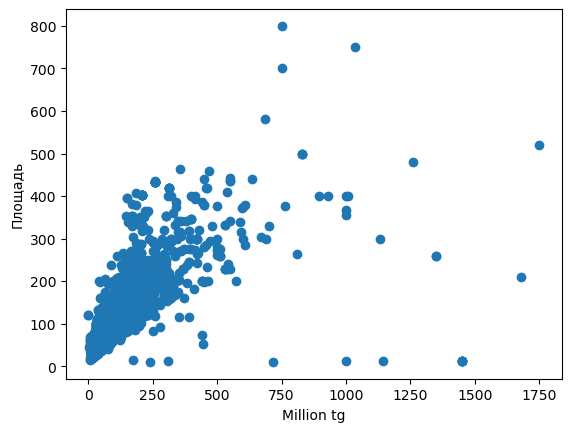

In [11]:
plt.scatter(x, df6["–ü–ª–æ—â–∞–¥—å –∫–≤–º–µ—Ç—Ä"])
plt.xlabel("Million tg")
plt.ylabel("–ü–ª–æ—â–∞–¥—å")

In [14]:
labels, freqs = np.unique(df6['–†–∞–π–æ–Ω'], return_counts=True)

sorted_freqs_ix = np.argsort(freqs)[::-1]

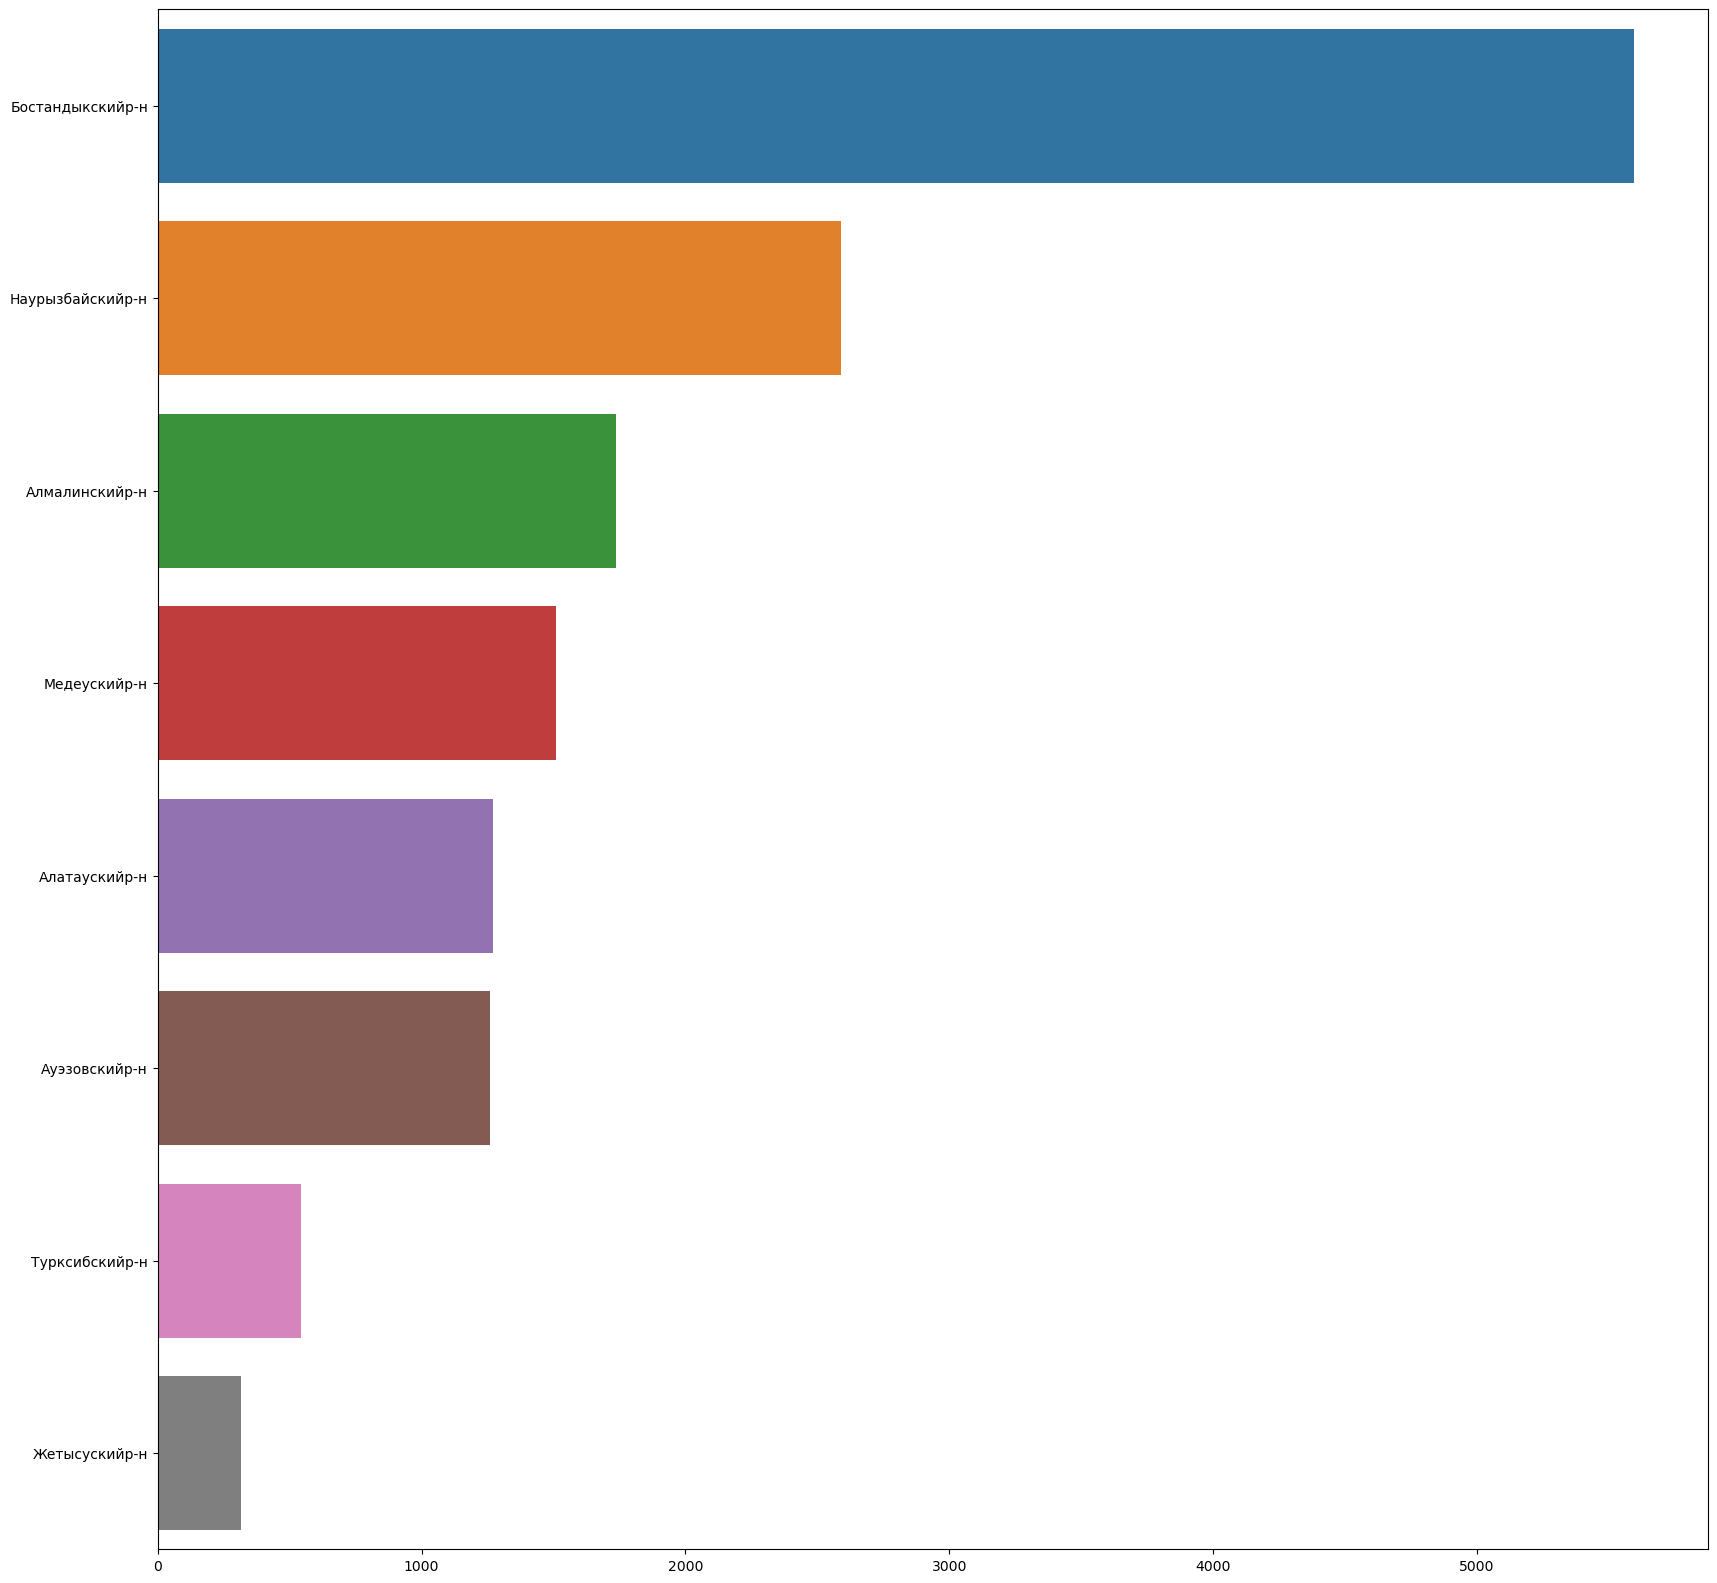

In [15]:
plt.figure(figsize=(20, 20))
sns.barplot(y=labels[sorted_freqs_ix], x=freqs[sorted_freqs_ix]);

Text(0, 0.5, '–†–∞–π–æ–Ω')

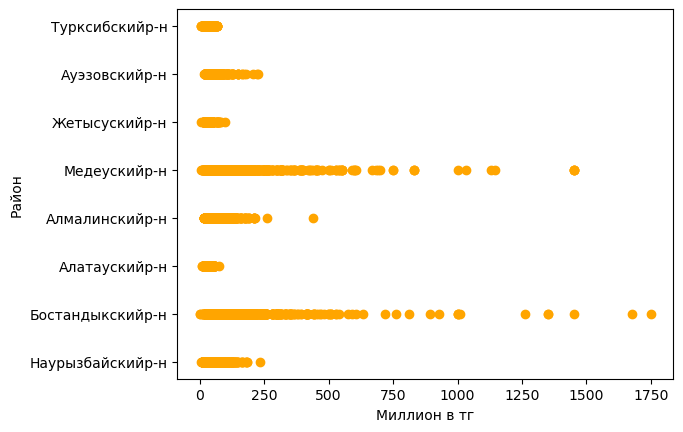

In [12]:
plt.scatter(x, df6["–†–∞–π–æ–Ω"], color="orange")
plt.xlabel("–ú–∏–ª–ª–∏–æ–Ω –≤ —Ç–≥")
plt.ylabel("–†–∞–π–æ–Ω")

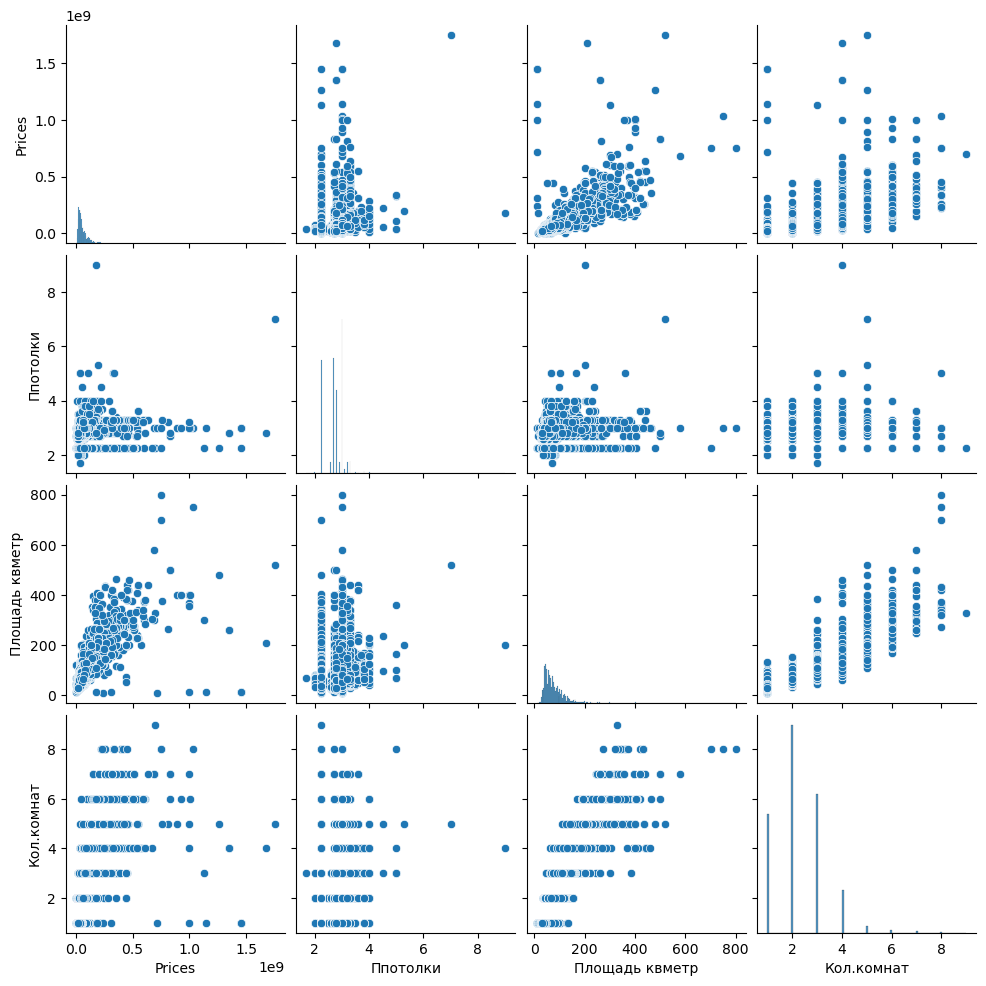

In [13]:
sns.pairplot(df6)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


X = df10.drop(["Prices"], axis="columns")
y = df10["Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [115]:
model_selection_df = pd.DataFrame(columns=['clf', 'name', 'accuracy train',"accuracy test"])

In [116]:
params = {
    'fit_intercept': [True, False],
    'n_jobs': [None, -1]
}

lnr_grid_search = GridSearchCV(LinearRegression(), params, cv=5)
lnr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [None, -1]})

In [117]:
lnr_grid_search.best_params_

{'fit_intercept': True, 'n_jobs': None}

In [118]:
def score(clf, name, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    tr = clf.score(X_train, y_train)
    ts = clf.score(X_test, y_test)
    arr = {"clf": clf, "name": name, "accuracy train": tr, "accuracy test": ts}
    return arr
res = score(lnr_grid_search, "LinearRegression")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\79603173.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


clf              name  \
0  GridSearchCV(cv=5, estimator=LinearRegression(...  LinearRegression   

   accuracy train  accuracy test  
0        0.758613       0.735717

In [119]:
knn = {
    "n_neighbors": [2, 5, 10],
    "weights": ['uniform', 'distance']
    }

knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn, cv=5)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 5, 10],
                         'weights': ['uniform', 'distance']})

In [121]:
knn_grid_search.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [122]:
res = score(knn_grid_search, "KNeighborsRegressor")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\2563930843.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


clf                 name  \
0  GridSearchCV(cv=5, estimator=LinearRegression(...     LinearRegression   
1  GridSearchCV(cv=5, estimator=KNeighborsRegress...  KNeighborsRegressor   

   accuracy train  accuracy test  
0        0.758613       0.735717  
1        0.990316       0.832695

In [124]:
dcr = {
    'max_depth': [None, 2, 5, 7],
    'min_samples_split': [2, 5, 17],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['auto', 'sqrt', 'log2'] 
}

dcr_grid_search = GridSearchCV(DecisionTreeRegressor(), dcr, cv=5)
dcr_grid_search.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 17]})

In [125]:
dcr_grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 17}

In [126]:
res = score(dcr_grid_search, "DecisionTreeRegressor")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\1250307635.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


clf                   name  \
0  GridSearchCV(cv=5, estimator=LinearRegression(...       LinearRegression   
1  GridSearchCV(cv=5, estimator=KNeighborsRegress...    KNeighborsRegressor   
2  GridSearchCV(cv=5, estimator=DecisionTreeRegre...  DecisionTreeRegressor   

   accuracy train  accuracy test  
0        0.758613       0.735717  
1        0.990316       0.832695  
2        0.877904       0.800045

In [133]:
rfr = {
    'n_estimators': [5, 10, 20],     
    'max_depth': [None, 2, 5, 7],    
    'min_samples_split': [2, 5, 7],     
    'min_samples_leaf': [1, 2, 4],      
    'max_features': ['auto', 'sqrt', 'log2']  
}

rfr_grid_search = GridSearchCV(RandomForestRegressor(), rfr, cv=5)
rfr_grid_search.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [5, 10, 20]})

In [134]:
rfr_grid_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [135]:
res = score(rfr_grid_search, "RandomForestRegressor")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\3058213419.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


clf                   name  \
0  GridSearchCV(cv=5, estimator=LinearRegression(...       LinearRegression   
1  GridSearchCV(cv=5, estimator=KNeighborsRegress...    KNeighborsRegressor   
2  GridSearchCV(cv=5, estimator=DecisionTreeRegre...  DecisionTreeRegressor   
3  GridSearchCV(cv=5, estimator=RandomForestRegre...  RandomForestRegressor   

   accuracy train  accuracy test  
0        0.758613       0.735717  
1        0.990316       0.832695  
2        0.877904       0.800045  
3        0.907877       0.943348

# –ò—Ç–æ–≥
–≠—Ç–æ—Ç –ø—Ä–æ–µ–∫—Ç —Å–æ–∑–¥–∞–Ω –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –¥–æ–º–æ–≤ –≤ –≥–æ—Ä–æ–¥–µ –ê–ª–º–∞—Ç—ã.
–õ—É—á—à–∏–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –±—ã–ª –≤—ã–±—Ä–∞–Ω —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –≤ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö 90.07% 
–∏ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö 94.33% —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –Ø —Ö–æ—Ç–µ–ª –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –ø–æ –¥—Ä—É–≥–∏–º –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º, –Ω–æ –¥—Ä—É–≥–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã —Ç—Ä–µ–±–æ–≤–∞–ª–∏ –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –∏ —Å —É–∂–∞—Å–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é. 
{'max_depth': None,
'max_features': 'log2',
'min_samples_leaf': 1,
'min_samples_split': 2,
'n_estimators': 20}